# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from IPython.display import FileLink

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [271]:
data=pd.read_csv("music_dataset.csv")

In [272]:
data.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8,0.20,17,0.11,0.59,0.60
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99,0.51,30,0.61,0.25,0.71
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12,0.36,11,0.43,0.58,0.20
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50,0.89,44,0.18,0.04,0.63
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9,-0.62,71,0.82,0.59,0.61


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [274]:
print(data.shape[0])

4850


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              4850 non-null   object 
 1   Artist            4850 non-null   object 
 2   Streams           4850 non-null   int64  
 3   Daily Streams     4850 non-null   int64  
 4   Genre             4850 non-null   object 
 5   Release Year      4850 non-null   int64  
 6   Peak Position     4850 non-null   int64  
 7   Weeks on Chart    4850 non-null   int64  
 8   Lyrics Sentiment  4850 non-null   float64
 9   TikTok Virality   4850 non-null   int64  
 10  Danceability      4850 non-null   float64
 11  Acousticness      4850 non-null   float64
 12  Energy            4850 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 492.7+ KB


In [276]:
data.describe()

,Streams,Daily Streams,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
count,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,3.970579e+08,2.493418e+06,2007.725773,51.425773,52.280000,0.000478,50.776495,0.555280,0.501029,0.553091
std,2.307764e+08,1.457542e+06,10.341312,28.909270,29.472456,0.574915,29.325179,0.260619,0.287531,0.260541
min,1.130883e+06,1.158000e+04,1990.000000,1.000000,1.000000,-1.000000,0.000000,0.100000,0.000000,0.100000
25%,1.982039e+08,1.209343e+06,1999.000000,27.000000,27.000000,-0.500000,26.000000,0.330000,0.250000,0.320000
50%,3.929179e+08,2.486103e+06,2008.000000,51.000000,52.000000,0.000000,51.000000,0.560000,0.500000,0.550000
75%,5.978880e+08,3.781338e+06,2017.000000,76.000000,78.000000,0.490000,76.000000,0.780000,0.750000,0.770000
max,7.999510e+08,4.999643e+06,2025.000000,100.000000,103.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [277]:
data.isnull().sum()

Song                0
Artist              0
Streams             0
Daily Streams       0
Genre               0
Release Year        0
Peak Position       0
Weeks on Chart      0
Lyrics Sentiment    0
TikTok Virality     0
Danceability        0
Acousticness        0
Energy              0
dtype: int64

In [278]:
data.duplicated().sum()

0

<Figure size 1200x600 with 0 Axes>

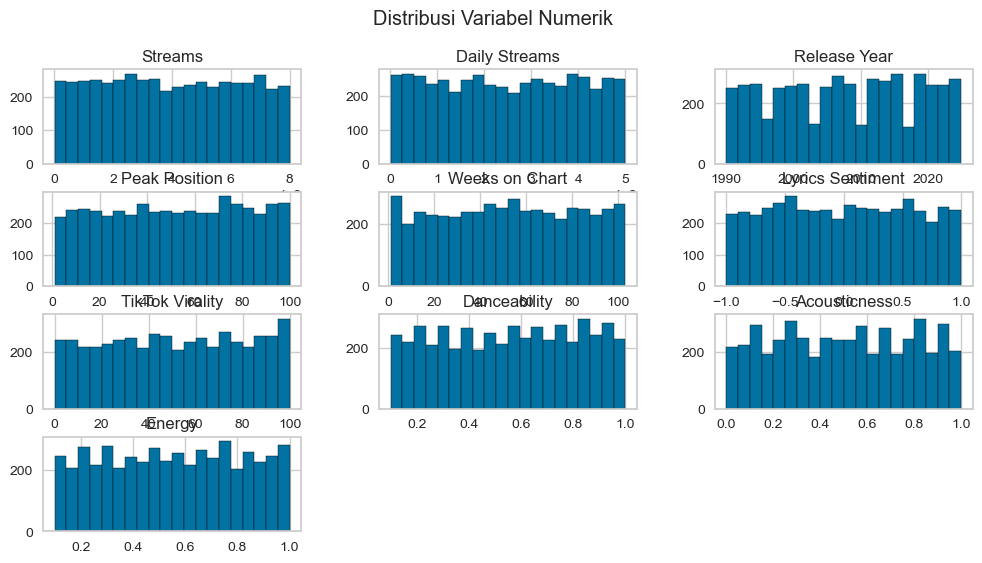

In [279]:
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

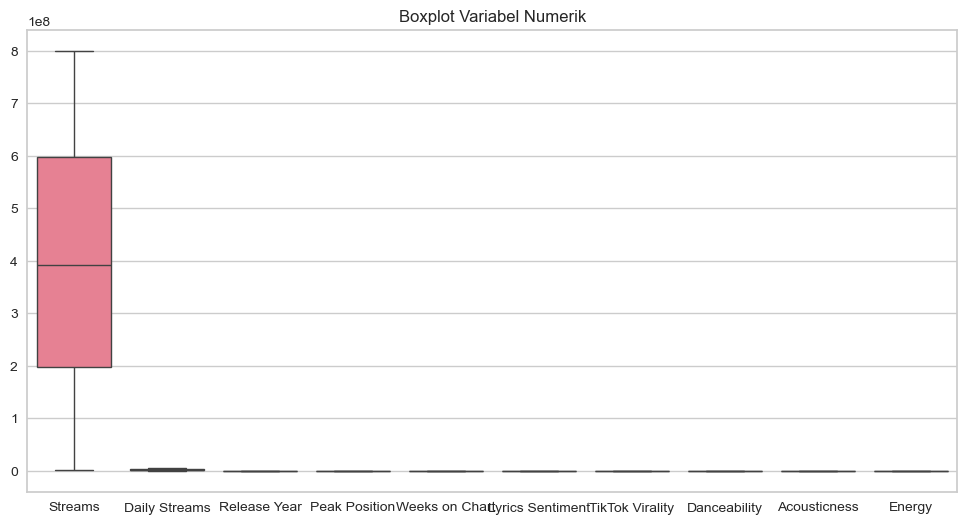

In [280]:
plt.figure(figsize=(12, 6))
sns.boxplot(data.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot Variabel Numerik")
plt.show()

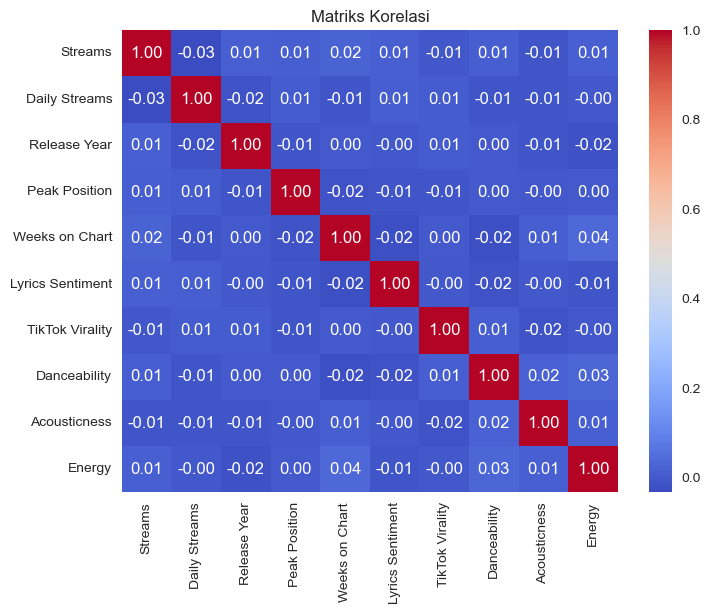

In [281]:
data1=data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [284]:
#deteksi atau penanganan outlier
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier di setiap kolom:")
print(outliers)


Jumlah Outlier di setiap kolom:
Streams             0
Daily Streams       0
Release Year        0
Peak Position       0
Weeks on Chart      0
Lyrics Sentiment    0
TikTok Virality     0
Danceability        0
Acousticness        0
Energy              0
dtype: int64


tidak memiliki data outlier maka tidak perlu untuk menangani data outlier

In [286]:
#memilih fitur
features=["Weeks on Chart", "Lyrics Sentiment", "TikTok Virality", ]
nData=data[features]

In [287]:
#standarisasi data
scaler = StandardScaler()
nData_scaled = scaler.fit_transform(nData)

In [288]:
#reduksi dimensi menggunakan PCA
pca=PCA(n_components=2)
nData_pca=pca.fit_transform(nData_scaled)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

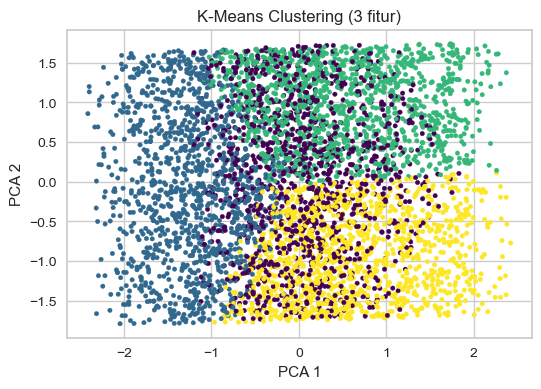

In [292]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(nData_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(nData_pca[:, 0], nData_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering (3 fitur)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [293]:
silhouette_avg = silhouette_score(nData_scaled, kmeans_labels)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.267


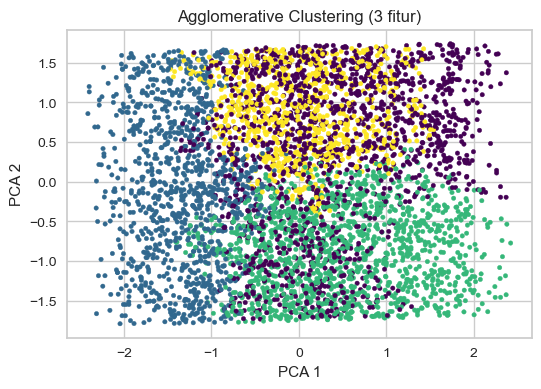

In [294]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(nData_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(nData_pca[:, 0], nData_pca[:, 1], c=agg_labels, cmap='viridis', s=10)
plt.title("Agglomerative Clustering (3 fitur)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [295]:
silhouette_avg = silhouette_score(nData_scaled, agg_labels)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.206


berdasarkan nilai silhoutte score metode clustering memiliki nilai besar yaitu menggunakan kmeans. selain itu dari visualisasi clustering lebih stabil menggunakan metode kmeans.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

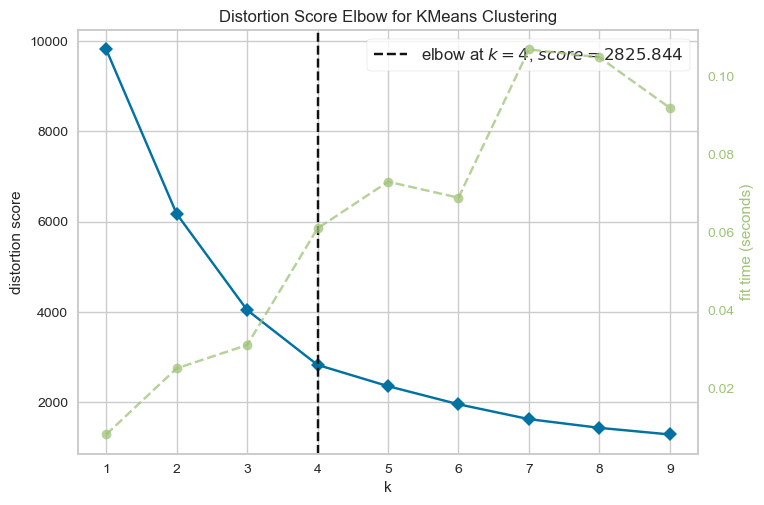

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [299]:
#menentukan jumlah cluster yang optimal dengan metode elbow
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(nData_pca)
visualizer.show()

berdasarkan metode elbow K yang didapat memiliki nilai 4. sehingga n cluster yang lebih tepat digunakan dalam metode kmeans yaitu 4

In [301]:
#memilih metode kmeans dengan 4 cluster berdasarkan elbow
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_label = kmeans.fit_predict(nData_scaled)
silhouette_avg = silhouette_score(nData_scaled, kmeans_labels)

print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.267


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [304]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

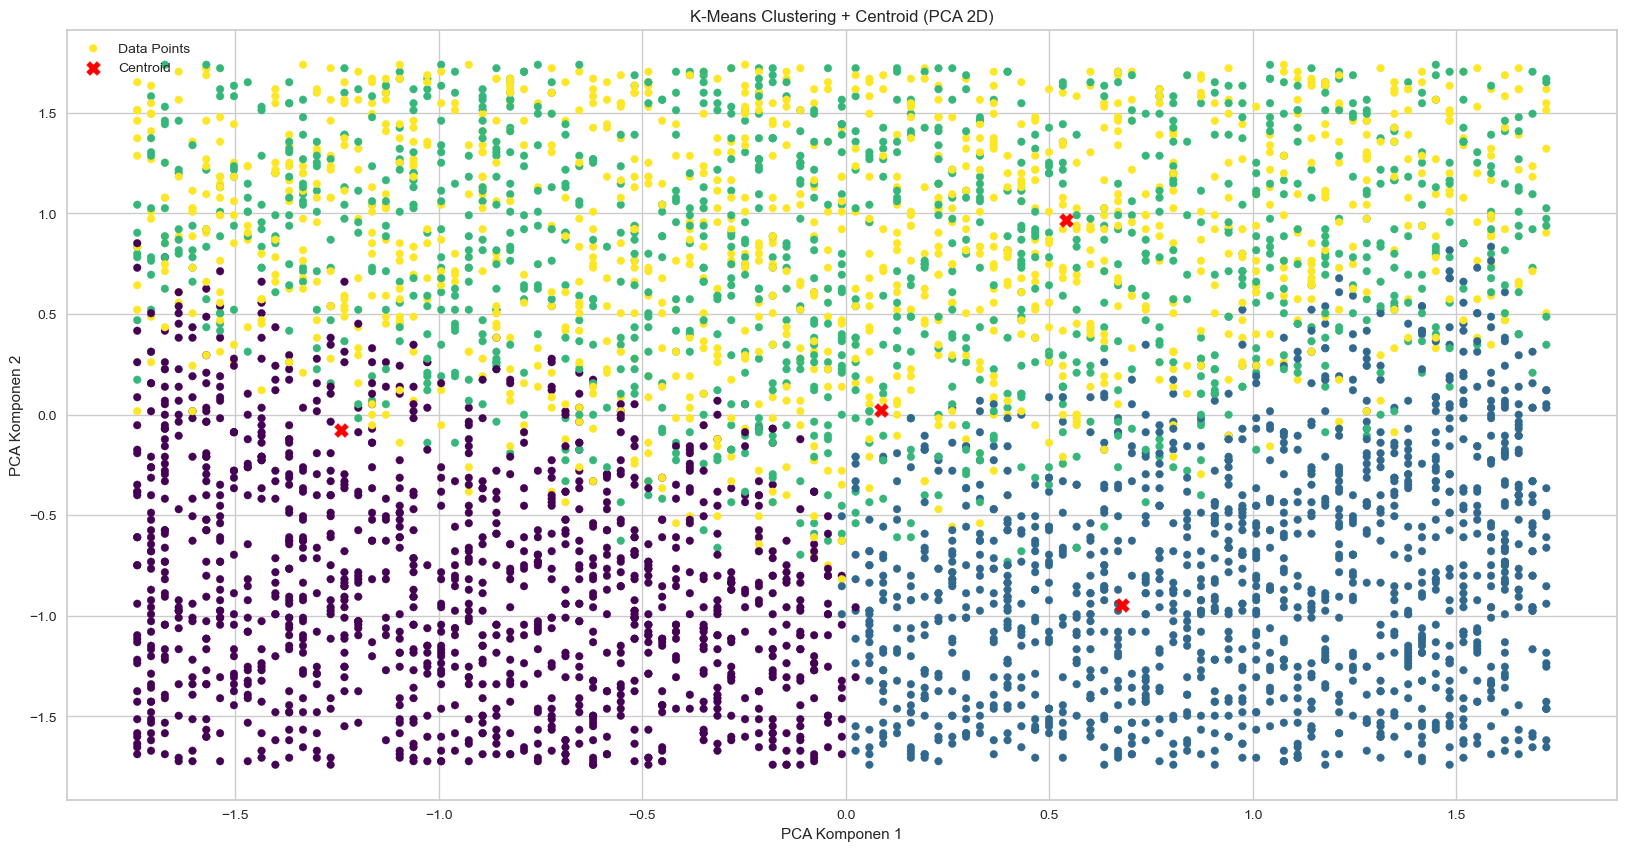

In [307]:
# Proyeksikan centroid ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(20, 10))
plt.scatter(nData_scaled[:, 0], nData_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering + Centroid (PCA 2D)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.grid(True)
plt.show()

In [308]:
# Centroid dalam skala standar (hasil setelah StandardScaler)
centroids_scaled = kmeans.cluster_centers_

# Kembalikan ke skala asli (inverse transform)
centroids_original = scaler.inverse_transform(centroids_scaled)

# Buat DataFrame untuk tampilkan centroid dengan nama fitur
centroid_df = pd.DataFrame(centroids_original, columns=features)
centroid_df.index.name = "Cluster"
print("Nilai Centroid Tiap Cluster (dalam skala asli):")
display(centroid_df)


Nilai Centroid Tiap Cluster (dalam skala asli):


,Weeks on Chart,Lyrics Sentiment,TikTok Virality
Cluster,,,
0,24.224299,-0.476602,50.889550
1,80.545095,-0.456630,49.687500
2,51.813366,0.453447,78.806846
3,50.475465,0.494146,22.730964


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [312]:
# Type your code here
data_normalized= pd.DataFrame(nData_scaled, columns=features)
data['Cluster'] = kmeans_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [315]:
data_normalized[features] = scaler.inverse_transform(data_normalized[features])

In [316]:
data_original = data.copy()
data_original[features] = data_normalized[features]

In [317]:
#memastikan data yang telah diproses sudah masuk kedalam tabel data awal dan nilai yang dinormalisasi sudah berubah sesuai bentuk awal data
data.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy,Cluster
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8,0.20,17,0.11,0.59,0.60,3
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99,0.51,30,0.61,0.25,0.71,3
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12,0.36,11,0.43,0.58,0.20,3
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50,0.89,44,0.18,0.04,0.63,3
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9,-0.62,71,0.82,0.59,0.61,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [319]:
cluster_means = data.groupby("Cluster")[features].mean()
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
         Weeks on Chart  Lyrics Sentiment  TikTok Virality
Cluster                                                   
0             24.239389         -0.476443        50.918506
1             80.513428         -0.456445        49.790679
2             51.767974          0.456046        78.769608
3             50.516074          0.493426        22.703046


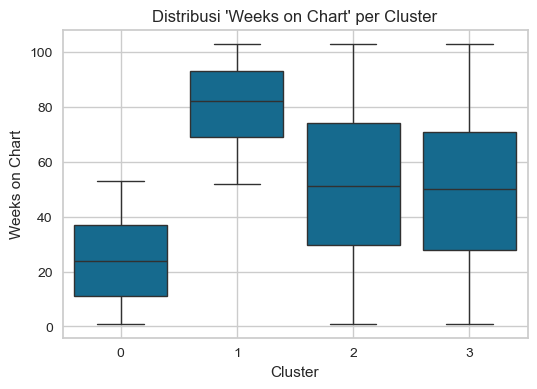

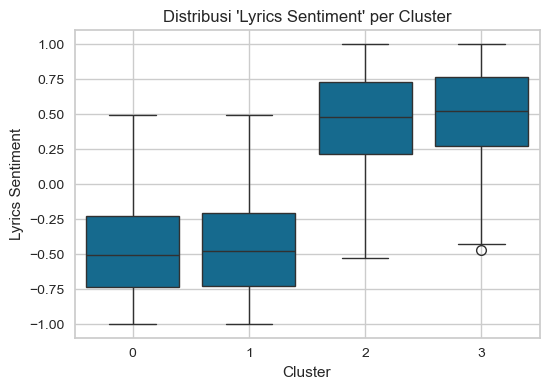

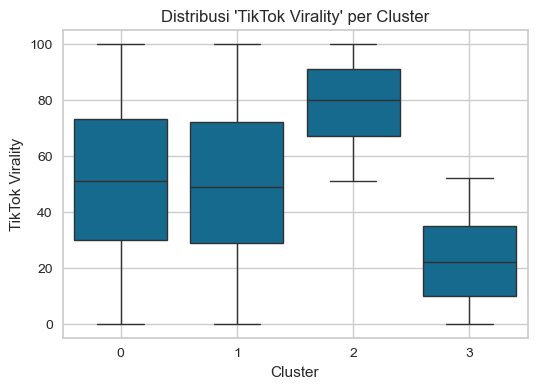

In [320]:
#untuk mengetahui nilai batas tiap-tiap cluster
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Cluster", y=feature, data=data)
    plt.title(f"Distribusi '{feature}' per Cluster")
    plt.grid(True)
    plt.show()

# Analisis Karakteristik Cluster dari Model K-Means

# Cluster 0: 
- **Weeks on Chart** : 24.22 Minggu
- **Lyrics Sentiment** : -0.48
- **TikTok Virality** = 50.89
- analisis : Lagu dengan sentimen negatif dan tidak bertahan lama, meski sedikit viral → Mungkin hanya sekadar tren sesaat.

# Cluster 1: 
- **Weeks on Chart** : 	80.55 Minggu
- **Lyrics Sentiment** : -0.46
- **TikTok Virality** = 49.69
- Analisis : Lagu yang paling lama bertahan di chart, meskipun liriknya negatif dan tidak terlalu viral → Mungkin lagu kuat secara musikal atau populer secara tradisional.

# Cluster 2: 
- **Weeks on Chart** : 	51.81 Minggu
- **Lyrics Sentiment** : 0.45
- **TikTok Virality** = 78.81
- Analisis: Lagu yang viral dan positif, bertahan cukup lama → Ini bisa jadi lagu TikTok hits yang juga dinikmati luas.

# Cluster 3: 
- **Weeks on Chart** : 	50.48 Minggu
- **Lyrics Sentiment** : 0.49
- **TikTok Virality** = 22.73
- Analisis : Lagu positif tapi tidak viral → Mungkin punya pesan bagus tapi tidak menonjol di platform sosial.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [323]:
cluster_means.to_csv("Cluster_Characteristics.csv")
data_original.to_csv("Music Dataset_clustered.csv", index=False)
centroid_df.to_csv("Centroid_Values.csv", index=False)

print("Clustering with PCA completed and results saved.")

Clustering with PCA completed and results saved.


In [324]:
print("Download clustered dataset:")
display(FileLink("Music Dataset_clustered.csv"))

print("Download cluster characteristics:")
display(FileLink("Cluster_Characteristics.csv"))

print("Download centroid values:")
display(FileLink("Centroid_Values.csv"))

Download clustered dataset:


C:\Users\snsv\Belajar Pyhton Dasar\Machine learning pemula\Music\Music Dataset_clustered.csv

Download cluster characteristics:


C:\Users\snsv\Belajar Pyhton Dasar\Machine learning pemula\Music\Cluster_Characteristics.csv

Download centroid values:


C:\Users\snsv\Belajar Pyhton Dasar\Machine learning pemula\Music\Centroid_Values.csv